# Подготовка к работе

Импортирование библиотек

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Импортирование датасета

In [3]:
df = pd.read_csv('Dataset_salary_2024.csv')

# Основная работа с датасетом

За основу я возьму целевую переменную, которую объявил ранее (В первой практической работе).
Буду использовать Countplot для отображения количества наблюдений для каждого типа занятости.
Наибольший признак - тип занятости с наибольшим количеством наблюдений.
Наименьший признак - тип занятости с наименьшим количеством наблюдений.

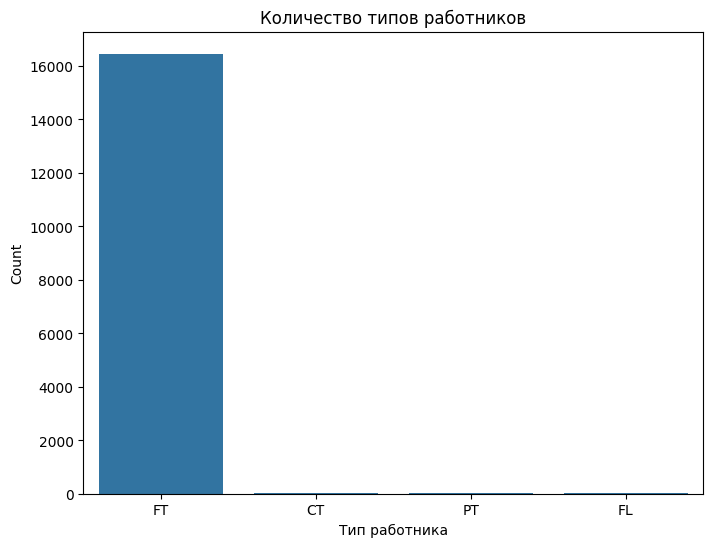

Наибольший признак: FT
Наименьший признак: FL


In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='employment_type', data=df)
plt.title('Количество типов работников')
plt.xlabel('Тип работника')
plt.ylabel('Count')
plt.show()

max_count = df['employment_type'].value_counts().idxmax()
min_count = df['employment_type'].value_counts().idxmin()
print(f"Наибольший признак: {max_count}")
print(f"Наименьший признак: {min_count}")

Barplot показывает средние значения зарплаты для каждого типа занятости.
Наибольшее среднее значение определяется по высоте столбцов на графике
Наибольший доверительный интервал можно оценить по разбросу "усов" (длине) на графике.
Наибольшее среднее значение зарплаты относится к типу занятости с наивысшим средним уровнем зарплаты.
Наибольший доверительный интервал может указывать на наибольшую дисперсию зарплат внутри этой категории.

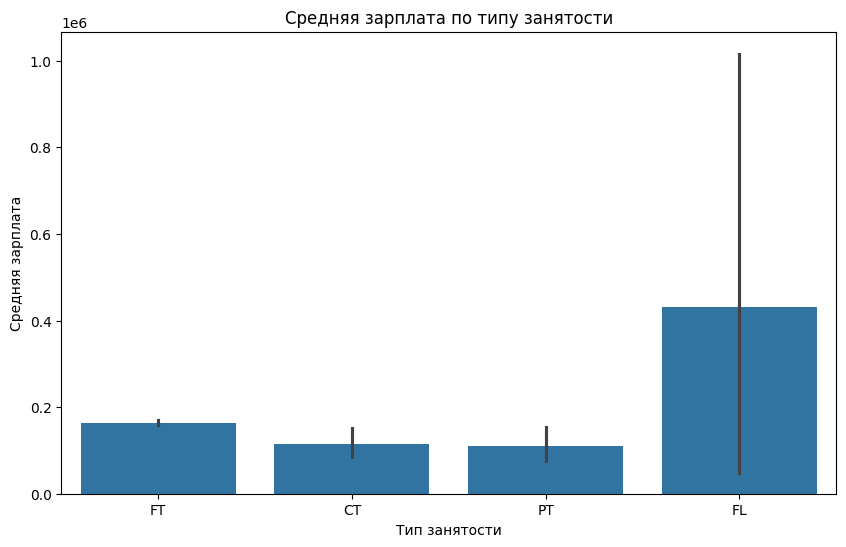

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='salary', data=df)
plt.title('Средняя зарплата по типу занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Средняя зарплата')
plt.show()


Boxplot для зарплаты по типу занятости.
Наибольшую медиану можно определить по положению горизонтальной линии внутри ящика. Наибольшее количество выбросов можно определить по количеству точек за пределами "усов". Наименьшее количество выбросов также можно оценить по графику.

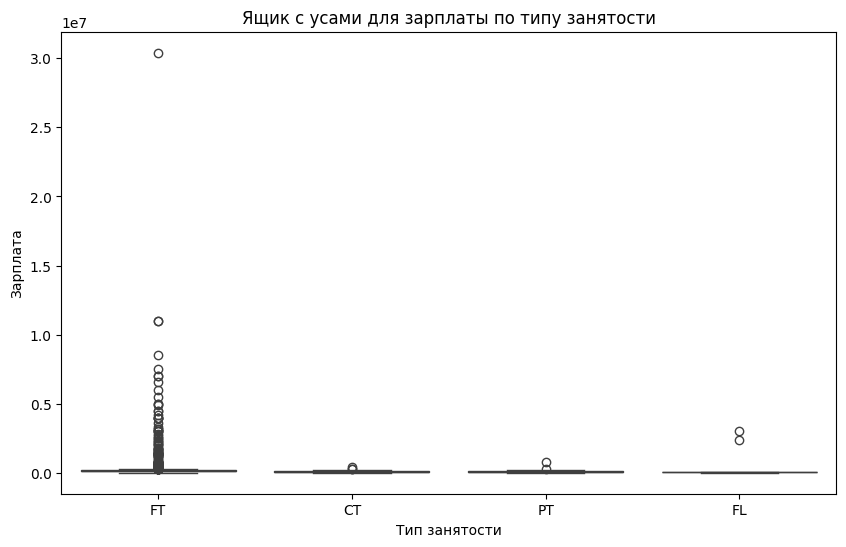

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary', data=df)
plt.title('Ящик с усами для зарплаты по типу занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Зарплата')
plt.show()

Далее нужно создать тепловую карту кареляции. В начале определяются признаки, для которых будет вычислена корреляционная матрица: ['salary', 'salary_in_usd']. Затем создается матрица корреляции corr_matrix для этих признаков из датафрейма df. Далее строится тепловая карта с использованием библиотеки Seaborn. На тепловой карте каждая ячейка представляет собой корреляцию между двумя признаками: чем более интенсивный цвет (в данном случае, от холодного к теплому), тем сильнее корреляция. Аргументы annot=True и fmt='.2f' добавляют числовые значения корреляции с двумя знаками после запятой в ячейки тепловой карты, что помогает лучше интерпретировать данные. Карта использует цветовую схему 'coolwarm', где теплые цвета (оттенки красного) обозначают положительные корреляции (чем темнее цвет, тем сильнее корреляция), а холодные цвета (оттенки синего) обозначают отрицательные корреляции.

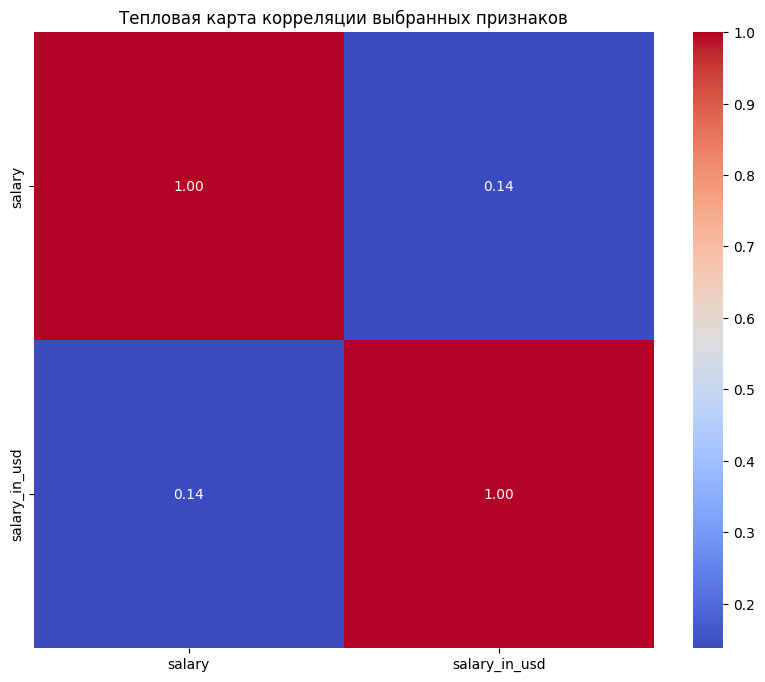

In [6]:
selected_features = ['salary', 'salary_in_usd']
corr_matrix = df[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции выбранных признаков')
plt.show()


Использование Pairplot.
Функция sns.pairplot(df) из библиотеки Seaborn автоматически создает матрицу диаграмм рассеяния для всех числовых признаков в df. На главной диагонали располагаются гистограммы распределений каждого признака, а вне диагонали - диаграммы рассеяния, где каждая точка представляет собой одно измерение пары признаков.

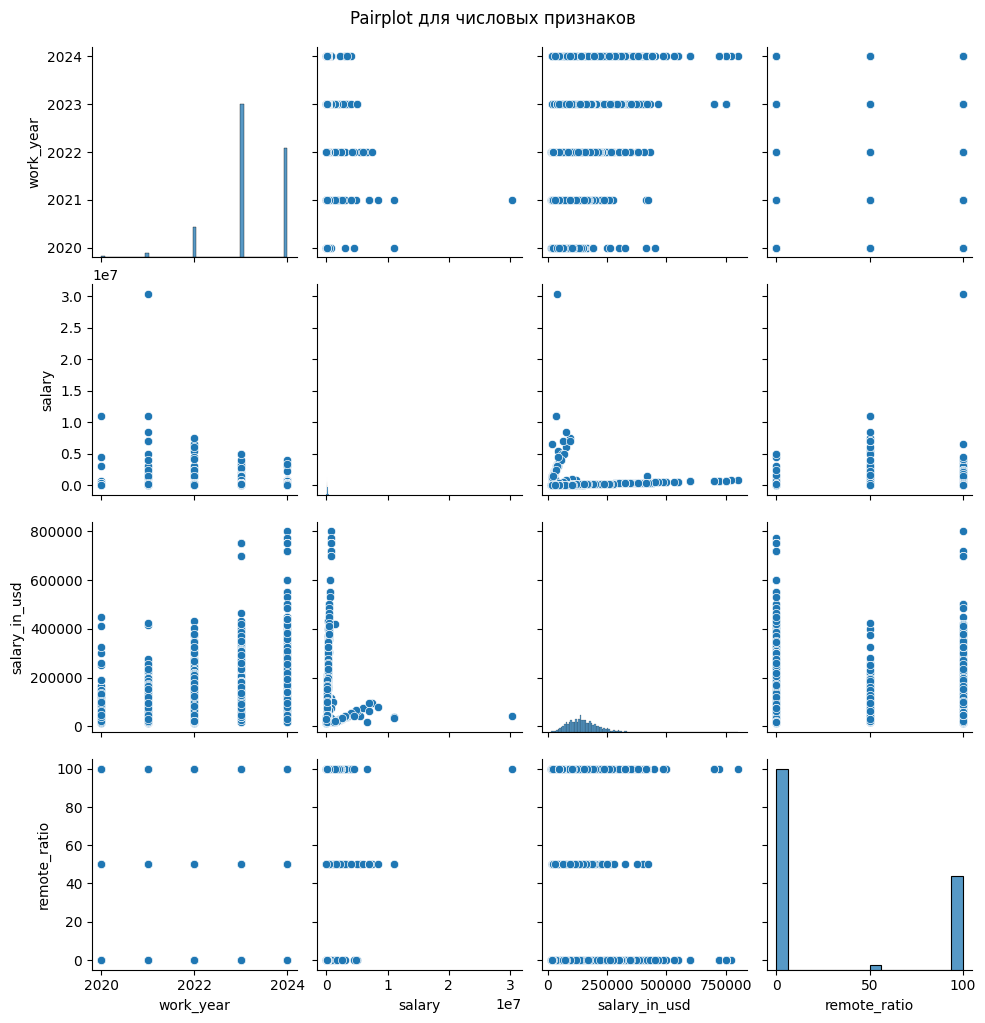

In [7]:
sns.pairplot(df)
plt.suptitle('Pairplot для числовых признаков', y=1.02)
plt.show()

Violinplot - представляет собой комбинацию ящика с усами (boxplot) и ядерной оценки плотности (KDE) распределения данных. Строка plt.figure(figsize=(10, 6)) создает новую фигуру для графика с размерами 10x6 дюймов. А sns.violinplot(x='employment_type', y='salary', data=df, inner='quartile') строит Violinplot, где по оси x отображаются различные категории типа занятости, а по оси y - значения зарплаты. Внутренние части Violinplot отмечены квартилями (inner='quartile'), что помогает увидеть распределение данных внутри каждой категории.

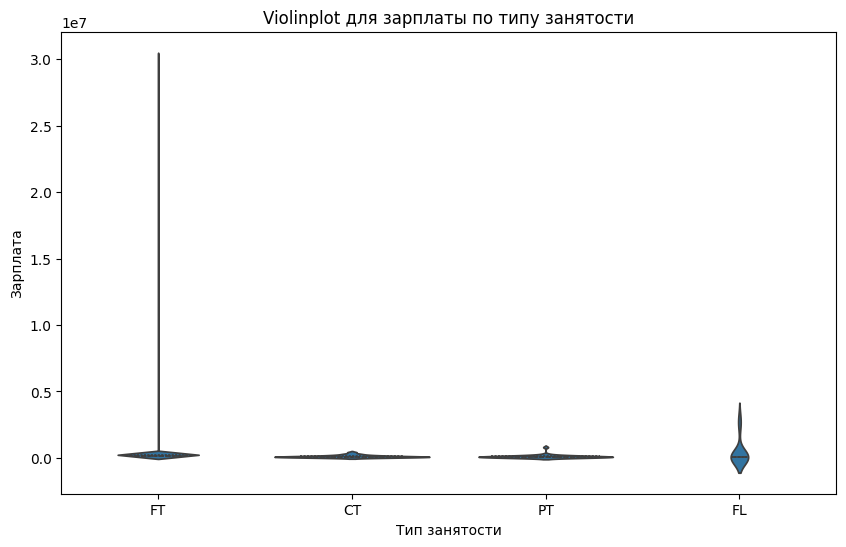

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='employment_type', y='salary', data=df, inner='quartile')
plt.title('Violinplot для зарплаты по типу занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Зарплата')
plt.show()

Implot представляет собой линейную регрессию. Строка sns.lmplot(x='work_year', y='salary', data=df) строит scatter plot с линией линейной регрессии. На оси x отображаются значения года работы, на оси y - значения зарплаты. Точки на графике представляют собой отдельные наблюдения данных, а линия показывает линейную зависимость между этими переменными, рассчитанную с помощью метода наименьших квадратов.

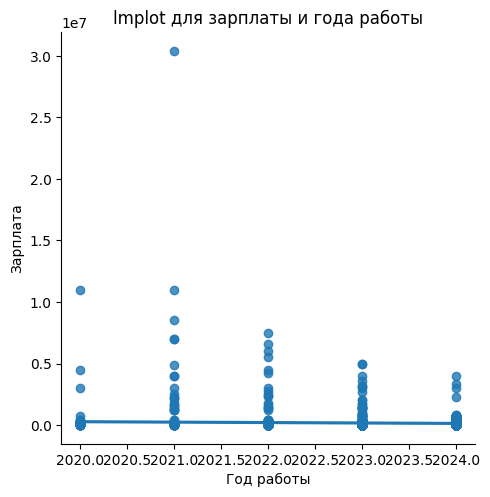

In [11]:
sns.lmplot(x='work_year', y='salary', data=df)
plt.title('lmplot для зарплаты и года работы')
plt.xlabel('Год работы')
plt.ylabel('Зарплата')
plt.show()